# Projet : analyse des joueurs de Fifa 2022
Auteur : Simon Decomble

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans, SpectralClustering
import importlib
import sys
from sklearn import metrics

On écrit un module Python fifa avec un sous-module fifa_utils contenant des fonctions utiles au nettoyage des données ou traitement particuliers. Cela permet d'alléger le notebook, de séparer le code métier et potentiellement d'effectuer des tests.

In [2]:
sys.path.append("..")
from fifa import fifa_utils as ffu 
_ = importlib.reload(ffu) #pour reloader en cas de modification

## Importation du dataset

In [3]:
data = pd.read_csv("../data/players_22.csv", low_memory=False)

In [67]:
data.head(20)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


## 1ere observation

In [9]:
df = data.copy()
pd.set_option('display.max_columns', None)
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [10]:
df.shape

(19239, 110)

Le dataset brut contient 19 239 lignes et 110 colonnes.

## 1. Analyse descriptive des données

## 1.2 Préparation des données

### Suppression initiale de colonnes

On supprime les colonnes qui ne nous serviront nécessairement pas à l'analyse, ex : images, liens, redondances (noms inutiles puisqu'on a un id correspondant), positions en équipe nationale (puisqu'on ne garde que la première position).

In [11]:
obvious_drops = ["player_url", "short_name", "long_name", "dob", "club_name", "league_name", "club_position", "club_jersey_number", "club_loaned_from", "club_joined", "club_contract_valid_until", "nationality_name", "nation_position", "nation_jersey_number", "work_rate", "body_type", "real_face", "release_clause_eur", "player_tags", "player_traits", "player_face_url", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url"]

In [12]:
df = df.drop(obvious_drops, axis=1)

### Position des joueurs

On ne garde que la première position du joueur. On réalise donc ce traitement sur l'ensemble des lignes.

In [13]:
df["player_position"] = df["player_positions"].map(ffu.keep_first_pos)
df = df.drop(["player_positions"], axis=1)

On change la granularité des positions de joueurs, pour ne garder que 4 valeurs "GK" pour goal, "DEF" pour les défenseurs, "MID" pour les milieux, "FWD" pour les attaquants.

In [14]:
df["player_position"].unique() #toutes les positions du dataset

array(['RW', 'ST', 'LW', 'CM', 'GK', 'CDM', 'CF', 'LM', 'CB', 'CAM', 'LB',
       'RB', 'RM', 'LWB', 'RWB'], dtype=object)

In [15]:
df["player_position"] = df["player_position"].map(ffu.set_global_position)


In [16]:
df["player_position"].unique() #toutes les positions du dataset

array(['FWD', 'MID', 'GK', 'DEF'], dtype=object)

### Age des joueurs

On créé des groupes d'âge : -20, 20-25, 25-30, 30-35, 35+, ce qui est plus pertinent pour traiter un attribut d'âge.

In [17]:
df["age"] = df["age"].map(ffu.classify_age)

In [18]:
df["age"].unique()

array(['30-35', '+35', '25-30', '20-25', '-20'], dtype=object)

### Stats des joueurs

On détecte les colonnes susceptibles de contenir des "+/- \<nombre\>" à enlever, c'est à dire les colonnes du type object contenant des + ou -.

In [19]:
plus_minus_columns = []
for column in df.columns:
    if df[column].dtype == "object":
        values = df[column].unique()
        for value in values:
            if "+" in value or "-" in value:
                plus_minus_columns.append(column)
                break
print(plus_minus_columns)

['age', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


On retire la colonne "age" de cet ensemble car c'est notre traitement précédent qui a mis un "-" dans les noms de classes de cet attribut.

In [20]:
plus_minus_columns.remove("age")

On supprime de ces colonnes détectées les valeurs après le +/-, puis on convertit les valeurs en entier.

In [21]:
# exemple du traitement :
ffu.format_stat("12+4")

12

In [22]:
for column in plus_minus_columns:
    df[column] = df[column].map(ffu.format_stat)

In [23]:
df[plus_minus_columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,64,64,64,66,61,50,50,50,61,19
1,90,90,90,85,88,88,88,85,86,86,86,84,80,80,80,84,64,66,66,66,64,61,60,60,60,61,19
2,90,90,90,88,89,89,89,88,86,86,86,86,78,78,78,86,63,59,59,59,63,60,53,53,53,60,20
3,83,83,83,90,88,88,88,90,89,89,89,89,82,82,82,89,67,63,63,63,67,62,50,50,50,62,20
4,83,83,83,88,87,87,87,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,44,44,44,46,45,45,45,46,46,46,46,47,46,46,46,47,48,46,46,46,48,48,46,46,46,48,15
19235,45,45,45,47,46,46,46,47,47,47,47,49,47,47,47,49,49,46,46,46,49,48,44,44,44,48,14
19236,45,45,45,46,46,46,46,46,47,47,47,48,47,47,47,48,47,46,46,46,47,47,45,45,45,47,12
19237,47,47,47,47,47,47,47,47,45,45,45,45,39,39,39,45,33,29,29,29,33,32,26,26,26,32,15


### IMC des joueurs

Les masses des joueurs sont toutes formatées en kg, les tailles en cm, on convertit les tailles en m pour le calcul de l'IMC (indice de masse corporelle).

In [24]:
df["height_m"] = df["height_cm"].map(ffu.convert_cm_to_m)
df = df.drop("height_cm", axis=1)

On créé un attribut BMI, body mass index, qui correspond à l'IMC des joueurs : 
$$\frac{poids}{taille^2}$$

poids en $kg$  
taille en $m^2$

In [25]:
df["BMI"] = df["weight_kg"] / df["height_m"]**2

On supprime les colonnes de masse et taille puisque l'IMC porte ces informations et on cherche à éviter les features corrélées.

In [26]:
df = df.drop(["weight_kg", "height_m"], axis=1)

In [27]:
df[["BMI"]]

,BMI
0,24.913495
1,23.666910
2,23.735308
3,22.204082
4,21.366869
...,...
19234,19.753086
19235,22.857143
19236,22.724403
19237,22.052190


### Valeur des joueurs

On va discrétiser les valeurs en classes pertinentes, pour déterminer ces classes, on regarde les statistiques de ces colonnes et la distribution des données sous forme d'histogramme.

In [28]:
print("Nombre de valeurs manquantes :", df["value_eur"].isna().sum())

Nombre de valeurs manquantes : 74


On a quelques joueurs qui n'ont pas de valeur renseignée, pour éviter de les supprimer de la base de donnée sur un seul critère, on les placera dans une catégorie à part "unknown". On réalise des stats sur les autres.

In [29]:
values = df[np.logical_not(df["value_eur"].isna())]["value_eur"]

In [30]:
values.describe()

count    1.916500e+04
mean     2.850452e+06
std      7.613700e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.000000e+06
max      1.940000e+08
Name: value_eur, dtype: float64

On remarque que les valeurs sont comprises entre 9 000 et 194M, avec une médiane à 97 500€. Le 1er quartile à 47 500 et le 3e quartile à 2M laisse donc penser qu'il y a des outliers aux deux extrémités du spectres, on ne peut donc pas séparer linéairement en classes. On regarde la distribution des données. Il est nécessaire d'appliquer une échelle logarithmique à cause des valeurs extrêmes supérieures. 

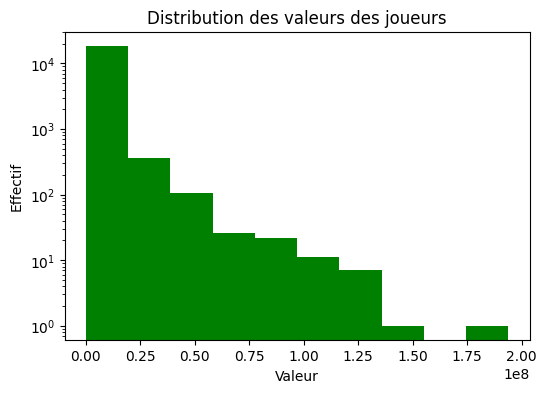

In [31]:
plt.figure(figsize=(6,4))
plt.hist(values, log=True, bins=10, color='green')
plt.title("Distribution des valeurs des joueurs")
plt.xlabel("Valeur")
plt.ylabel("Effectif")
plt.show()

Sur l'histogramme, les outliers polluent la visualisation, on va garder uniquement les 90% au centre du dataset selon les valeurs (entre 5e centile et 95 centile).

In [32]:
cent_5 = np.percentile(values, 5)
cent_95 = np.percentile(values, 95)
print(f"5e centile : {cent_5}\n95e centile : {cent_95}")

5e centile : 180000.0
95e centile : 11500000.0


In [33]:
main_values = values[np.logical_and(values >= cent_5, values <= cent_95)]
main_values.shape

(17294,)

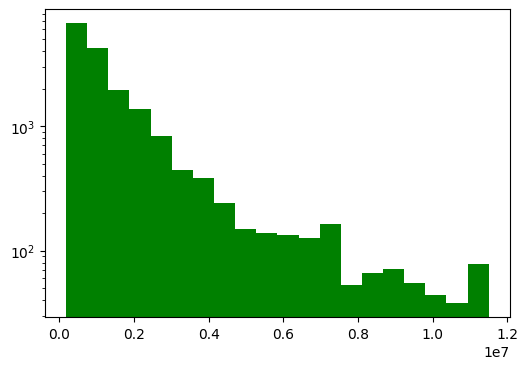

In [34]:
plt.figure(figsize=(6,4))
plt.hist(main_values, log=True, bins=20, color='g')
plt.show()

On calcule l'écart-type empirique et on forme 3 catégories dans l'histogramme : valeurs en dessous d'une fois $\sigma$ (l'écart-type), valeurs entre $\sigma$ et $2.\sigma$ et valeurs supérieure à $2.\sigma$.

In [35]:
value_std = np.std(main_values)

In [36]:
df["Dvalue"] = df["value_eur"].map(ffu.metric_category_from_std_reference(value_std))

In [37]:
df["Dvalue"].value_counts()

low         13829
moderate     2759
high         2577
unknown        74
Name: Dvalue, dtype: int64

### Salaire des joueurs

On applique la même démarche que pour les valeurs.

In [38]:
print("Nombre de valeurs manquantes :", df["wage_eur"].isna().sum())

Nombre de valeurs manquantes : 61


In [39]:
wages = df[np.logical_not(df["wage_eur"].isna())]["wage_eur"]

In [40]:
wages.describe()

count     19178.000000
mean       9017.989363
std       19470.176724
min         500.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      350000.000000
Name: wage_eur, dtype: float64

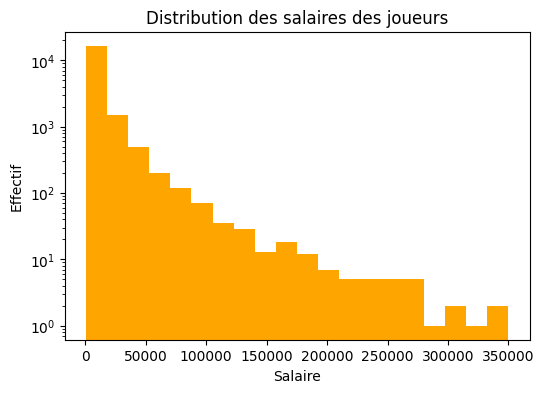

In [41]:
plt.figure(figsize=(6,4))
plt.hist(wages, log=True, bins=20, color='orange')
plt.title("Distribution des salaires des joueurs")
plt.xlabel("Salaire")
plt.ylabel("Effectif")
plt.show()

On calcule l'écart-type empirique et on forme 3 catégories dans l'histogramme : valeurs en dessous d'une fois $\sigma$ (l'écart-type), valeurs entre $\sigma$ et $2.\sigma$ et valeurs supérieure à $2.\sigma$.

In [42]:
wage_std = np.std(wages)

In [43]:
df["Dwage"] = df["wage_eur"].map(ffu.metric_category_from_std_reference(wage_std))

In [44]:
df["Dwage"].value_counts()

low         16922
moderate     1330
high          926
unknown        61
Name: Dwage, dtype: int64

On supprime les colonnes avec les valeurs et salaires, dont on a plus besoin (l'information -ou son absence- a été discrétisée sous forme de 4 catégories).

In [45]:
df = df.drop(["value_eur", "wage_eur"], axis=1)

In [46]:
print(f"Le dataset préparé est désormais de taille {df.shape}.")

Le dataset préparé est désormais de taille (19239, 84).


In [47]:
df.to_csv("../data/prepared_player_22.csv")

## 1.2 Analyse

### Attributs et statistiques descriptives

#### Description des attributs

Tous les attributs gardés jusqu'ici (pertinence et information compactée) son listés ci-dessous.

In [48]:
features_list = list(df.columns)
for feat in features_list:
    print(feat, end="  ")

sofifa_id  overall  potential  age  club_team_id  league_level  nationality_id  nation_team_id  preferred_foot  weak_foot  skill_moves  international_reputation  pace  shooting  passing  dribbling  defending  physic  attacking_crossing  attacking_finishing  attacking_heading_accuracy  attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  movement_acceleration  movement_sprint_speed  movement_agility  movement_reactions  movement_balance  power_shot_power  power_jumping  power_stamina  power_strength  power_long_shots  mentality_aggression  mentality_interceptions  mentality_positioning  mentality_vision  mentality_penalties  mentality_composure  defending_marking_awareness  defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  

Sofifia_id est la clé primaire d'un joueur, c'est le numéro qui identifie de manière unique chaque joueur.  
Age est la catégorie d'âge du joueur.  
Club_team_id, nation_team_id et nationality_id sont les identifiants de son équipe de championnat, de son équipe nationale et de sa nationalité.  
League level est le niveau de championnat dans lequel son club évolue.  
Player_position indique son poste (goal, défenseur, milieu, attaquant).  
BMI est son indice de masse corporelle.  
Dvalue indique la catégorie de valeur financière à laquelle il appartient (inconnue, basse, moyenne, haute).  
Dwage indique la catégorie de salaire qu'il reçoit (inconnu, bas, moyen, haut).  
Preferred_foot indique s'il est droitier ou gaucher du pied.  
Tous les autres attributs sont des statistiques numériques de jeu, liées aux déplacements, tirs, dribles etc. Overall et potential sont des statistiques globales d'évaluation du joueur.  

#### Statistiques des attributs catégoriels

On extrait les features catégoriels, qui n'ont pas trop de valeurs (ce qui exclut les id d'équipe ou de nationalité).

In [49]:
cat_features = ["age", "league_level", "player_position", "Dvalue", "Dwage", "preferred_foot", "international_reputation"]
df_cat = df[cat_features]

On peut afficher la répartition des différentes catégories pour ces attributs catégoriels. On remarque ainsi quels sont les modes, classes les plus représentées. On se rend aussi compte du déséquilibre de certaines classes.

In [46]:
matplotlib.rcParams['figure.figsize'] = (4, 2)

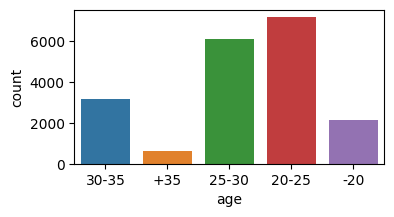

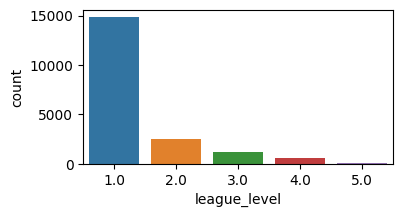

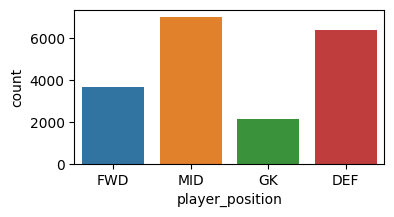

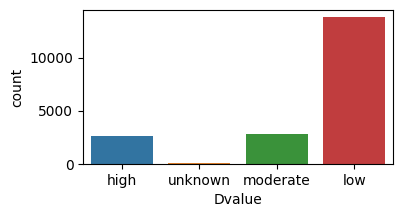

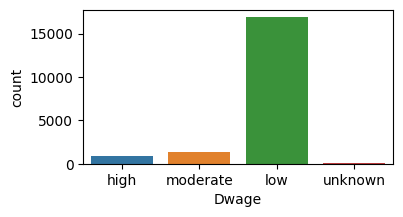

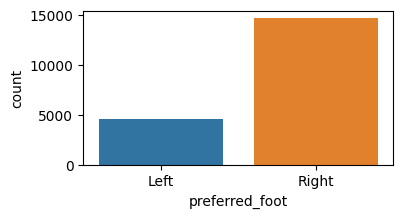

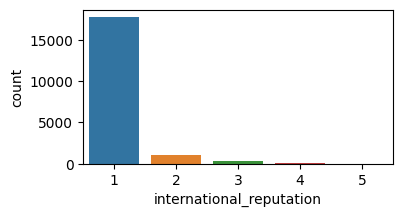

In [47]:
for cat_feature in cat_features:
    sns.countplot(x=df_cat[cat_feature])
    plt.show()

Ces visualisations nous permettent de savoir rapidement qu'il y a par exemple une grande majorité de droitiers, de joueurs de 20 à 30 ans. Que les quantités reflétant un avantage (valeur financière, salaire, réputation, niveau de ligue) sont élevées pour une minorité de joueurs et élevées pour très peu.  
Ainsi que la répartition entre les postes.

#### Statistiques des attributs numériques

On observe les statistiques (plus détaillées) sur les attributs numériques d'intéret. On retire en effet les identifiants de joueur ou d'équipes, qui ne sont pas propices à la réalisation de statistiques (leurs valeurs étant des clés et non des quantités).

In [50]:
num_features = set(features_list).difference(set(cat_features))
num_features = list(num_features.difference(set(["sofifa_id", "club_team_id", "nationality_id", "nation_team_id"])))

In [49]:
print(f"Nous avons, en tout, {len(num_features)} attributs numériques / statistiques de joueurs")

Nous avons, en tout, 73 attributs numériques / statistiques de joueurs


In [51]:
df_num = df[num_features]
df_num.describe()

,power_long_shots,mentality_penalties,lwb,cam,lcb,cf,goalkeeping_speed,ls,attacking_short_passing,lm,attacking_heading_accuracy,skill_moves,mentality_aggression,power_stamina,rcb,BMI,st,skill_long_passing,physic,goalkeeping_positioning,passing,lb,defending_standing_tackle,overall,rf,rs,attacking_crossing,movement_reactions,shooting,rw,mentality_positioning,mentality_interceptions,goalkeeping_kicking,cm,mentality_composure,gk,lcm,skill_curve,potential,goalkeeping_diving,power_shot_power,rcm,dribbling,skill_ball_control,defending_marking_awareness,lam,goalkeeping_reflexes,lw,attacking_volleys,cb,ldm,rm,goalkeeping_handling,mentality_vision,skill_dribbling,power_strength,defending_sliding_tackle,rdm,rb,movement_acceleration,movement_agility,ram,defending,cdm,rwb,movement_sprint_speed,movement_balance,weak_foot,power_jumping,attacking_finishing,pace,skill_fk_accuracy,lf
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,19239.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,19239.000000,19239.000000
mean,46.642705,47.858724,54.188679,55.916420,52.504808,55.562815,36.439962,54.687666,58.867977,56.455377,51.783877,2.352461,55.538957,63.084880,52.504808,22.773466,54.687666,53.072249,64.823289,16.229274,57.312562,53.502313,48.045584,65.772182,55.562815,54.687666,49.577421,61.450023,52.345297,55.694007,50.330215,46.613545,16.055356,55.257706,57.929830,21.282811,55.257706,47.268933,71.079370,16.406102,57.776860,55.257706,62.561174,58.472010,46.601746,55.916420,16.491814,55.694007,42.463849,52.504808,53.801237,56.455377,16.192474,53.964603,55.660429,65.007745,45.906700,53.801237,53.502313,64.652893,63.500078,55.916420,51.703630,53.801237,54.188679,64.714902,64.068611,2.946151,64.813504,45.894433,68.213071,42.249025,55.562815
std,19.411583,15.768583,13.869097,14.099482,14.863148,14.262141,10.751563,13.602736,14.490858,14.129834,17.294183,0.767659,16.972181,16.145279,14.863148,1.376121,13.602736,15.026569,9.791886,17.059779,10.068965,14.082365,21.232718,6.880232,14.262141,13.602736,18.034661,9.042281,14.051623,14.668290,19.621601,20.677077,16.564554,13.322119,12.159326,15.175006,13.322119,18.181085,6.086213,17.574028,13.192224,13.322119,9.651312,16.663722,20.200807,14.099482,17.884833,14.668290,17.653329,14.863148,13.951418,14.129834,16.839528,13.650481,18.784590,12.663518,20.755683,13.951418,14.082365,15.167399,14.862285,14.099482,16.189746,13.951418,13.869097,14.965426,14.324789,0.671560,12.122977,19.721023,10.933155,17.178590,14.262141
min,4.000000,7.000000,15.000000,15.000000,16.000000,15.000000,15.000000,16.000000,7.000000,15.000000,5.000000,1.000000,10.000000,12.000000,16.000000,15.618492,16.000000,9.000000,29.000000,2.000000,25.000000,14.000000,5.000000,47.000000,15.000000,16.000000,6.000000,25.000000,18.000000,14.000000,2.000000,3.000000,2.000000,15.000000,12.000000,9.000000,15.000000,6.000000,49.000000,2.000000,20.000000,15.000000,27.000000,8.000000,4.000000,15.000000,2.000000,14.000000,3.000000,16.000000,16.000000,15.000000,2.000000,10.000000,4.000000,19.000000,5.000000,16.000000,14.000000,14.000000,18.000000,15.000000,14.000000,16.000000,15.000000,15.000000,15.000000,1.000000,22.000000,2.000000,28.000000,4.000000,15.000000

In [51]:
nb_gk = df[df["player_position"] == "GK"].shape[0]
nb_gks_not_nan = ffu.nb_not_nan_in_column(df_num, "goalkeeping_speed")
print(f"Nombre de goals : {nb_gk}")
print(f"Nombre de valeurs de goalkeeping_speed renseignées dans le dataset : {nb_gks_not_nan}")

Nombre de goals : 2132
Nombre de valeurs de goalkeeping_speed renseignées dans le dataset : 2132


Ces statistiques sont nombreuses, nous allons creuser davantage :
- les statistiques générales : overall et potential
- une autre statistique propre à tous les joueurs : power_stamina
- une statistique propre aux joueurs non goal : physic
- une statistique propre aux goals : goalkeeping_speed
- une statistique commune à tous les joueurs, calculée lors de la phase de préparation à partir de la masse et de la taille : BMI

In [52]:
focus_features = ["overall", "potential", "power_stamina", "physic", "goalkeeping_speed", "BMI"]
df_num_focus = df_num[focus_features]
df_num_focus.describe()

,overall,potential,power_stamina,physic,goalkeeping_speed,BMI
count,19239.000000,19239.000000,19239.000000,17107.000000,2132.000000,19239.000000
mean,65.772182,71.079370,63.084880,64.823289,36.439962,22.773466
std,6.880232,6.086213,16.145279,9.791886,10.751563,1.376121
min,47.000000,49.000000,12.000000,29.000000,15.000000,15.618492
25%,61.000000,67.000000,56.000000,59.000000,27.000000,21.877551
50%,66.000000,71.000000,66.000000,66.000000,36.000000,22.790358
75%,70.000000,75.000000,74.000000,72.000000,45.000000,23.629490
max,93.000000,95.000000,97.000000,90.000000,65.000000,34.717839


Pour visualiser et interpréter plus facilement ces statistiques, on peut tracer les boîtes à moustache.

In [53]:
colors = ["turquoise", "green", "red", "yellow", "purple", "orange"]

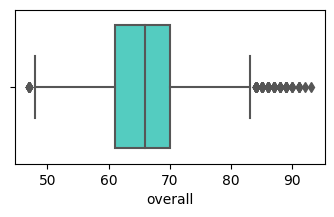

In [54]:
_ = sns.boxplot(x=df_num_focus[focus_features[0]], orient='h', color=colors[0])

Les valeurs de l'attribut overall sont assez étalées, les 3/4 des données sont situées entre 60 et 70, bien que les autres valeurs s'étalent jusqu'à 50 voir 80. On constate un nombre non négligeable d'outliers (les points gris, déterminées par l'algorithme natif de seaborn) notamment autour de 90 dans les extrêmes supérieurs.

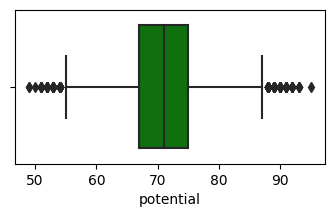

In [55]:
_ = sns.boxplot(x=df_num_focus[focus_features[1]], orient='h', color=colors[1])

De même, les potentiels sont peu concentrées autour de la valeur 70, les 3/4 centraux des données sont situés entre 65 et 75 et le quart restant de données est assez étalé, et on note encore plus d'outliers pour cette feature.

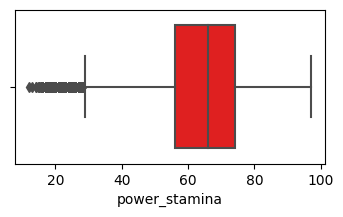

In [56]:
_ = sns.boxplot(x=df_num_focus[focus_features[2]], orient='h', color=colors[2])

La power_stamina médiane est à 66, avec un étalement des valeurs un peu plus important, et beaucoup d'outliers dans les extrêmes inférieurs, entre les valeurs 10 et 30.

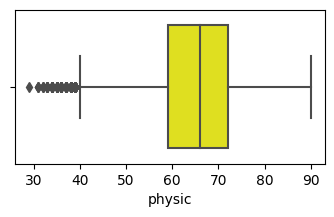

In [57]:
_ = sns.boxplot(x=df_num_focus[focus_features[3]], orient='h', color=colors[3])

La répartition pour "physic" est analogue à la précédente.

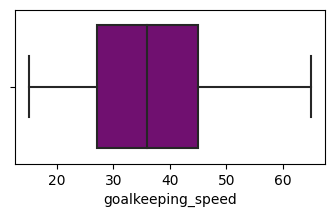

In [58]:
_ = sns.boxplot(x=df_num_focus[focus_features[4]], orient='h', color=colors[4])

La vitesse des gardiens de but est concentrée autour de 35, la majorité des données s'étalent entre 25 et 45, le quart restant s'étalent relativement peu comparé aux features précédemment observées (la boîte est plus large, les moustaches moins longues).

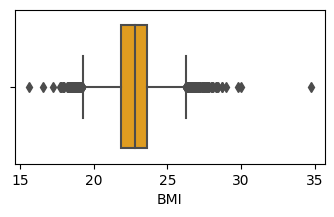

In [59]:
_ = sns.boxplot(x=df_num_focus[focus_features[5]], orient='h', color=colors[5])

Pour cet attribut d'indice de masse corporelle, on remarque que les données sont très concentrées, la grande majorité autour de la valeur de 23 (boîte très étroite). Le quart restant de données s'étale vers 18 pour la partir inférieure et jusque 27 pour la partie supérieure.   

On note un assez grand nombre d'outliers. Notamment un point au BMI de 35, très isolé du reste des données : il y a 5 unités d'écart avec le point le plus proche, alors que 3/4 des données sont comprises dans un intervalle inférieur à 2 unités.  
On peut essayer d'identifier le joueur correspondant à cet outlier :

In [60]:
id_focus = df[df_num_focus["BMI"] > 34]["sofifa_id"].iloc[0]

In [61]:
data[df["sofifa_id"] == id_focus]["long_name"].iloc[0]

'Saheed Adebayo Akinfenwa'

### Analyse de corrélation

Nous avons effectué la préparation initiale des données, à partir de critères logiques de formattage et de compression de certaines informations. Pour pousser plus loin le nettoyage de nos données afin de les fournir à un modèle d'apprentissage, on va analyser les corrélations entre features et supprimer celles qui sont trop corrélées à d'autres, car cela réduit les performances de nombreux modèles. On cherche à ne pas dupliquer l'information portée par ces attributs.  
On ne garde que les features numériques.

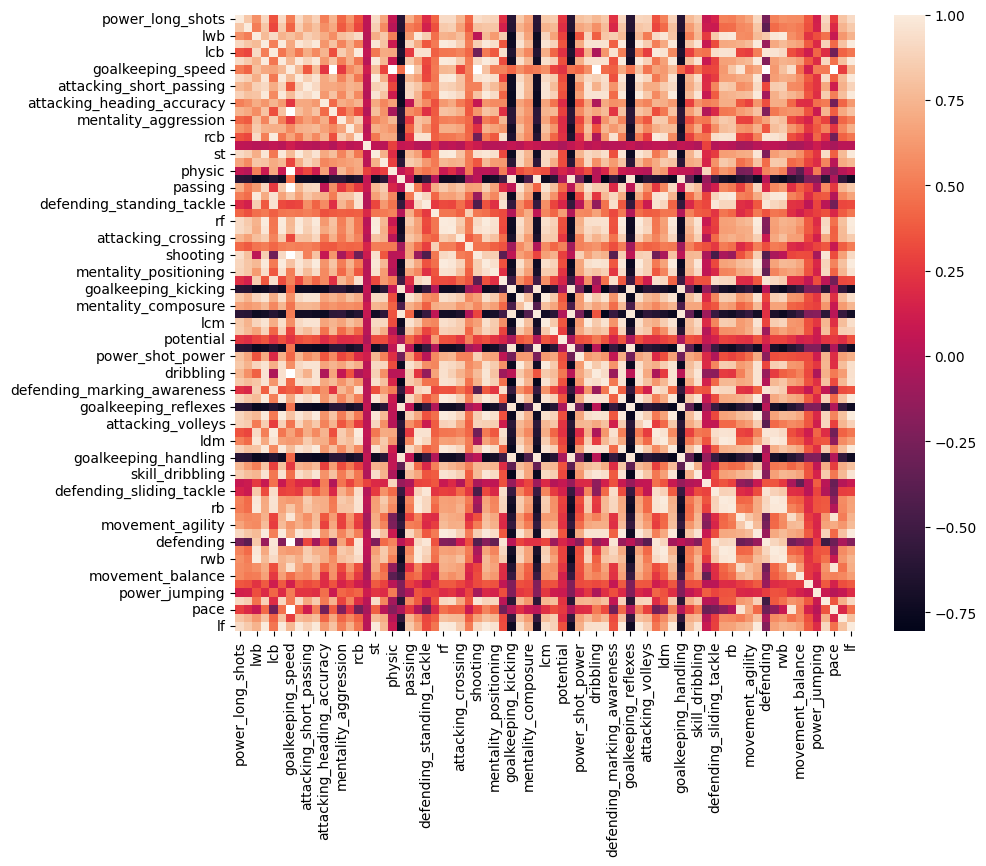

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr())
plt.show()

On observe pas mal de corrélations positives comme négatives, il est difficile d'y voir clair.  
Pour faciliter cette tâche nous allons afficher cette heatmap après un traitement de clustering.  
Ce traitement n'est pas possible avec des valeurs nulles (NaN), on va donc supprimer les goals et la colonne relative à ces derniers (goalkeeping_speed).

In [53]:
df_corr = df_num[df["player_position"] != "GK"]
df_corr = df_corr.drop(["goalkeeping_speed"], axis=1)
df_corr.shape

(17107, 72)

On regarde s'il reste des valeurs nulles dans les lignes.

In [54]:
df_corr.dropna(axis=0)
df_corr.shape

(17107, 72)

Il n'y a plus de NaN, on peut tracer la clustermap.

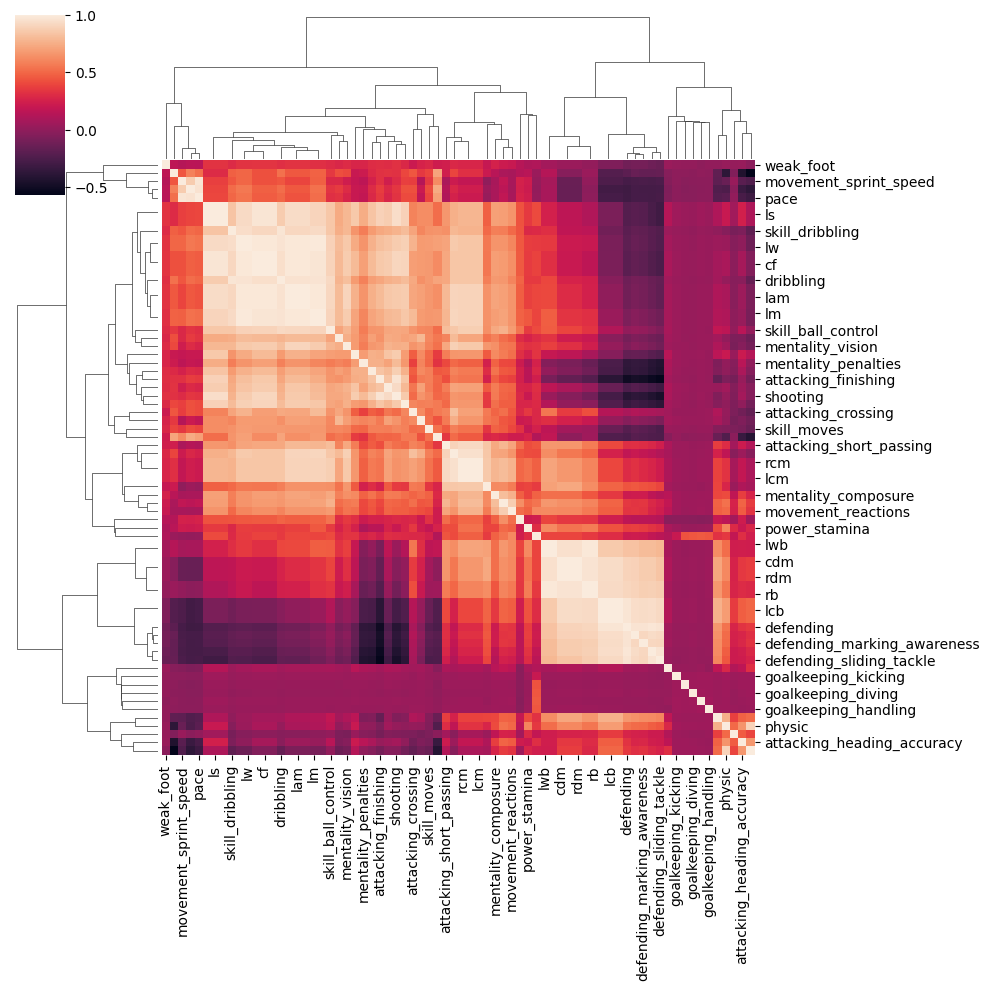

In [55]:
clustergrid = sns.clustermap(df_corr.corr())
plt.show()

Cette visualisation est beaucoup plus informative sur les groupes de features fortement corrélées entre-elles.  
On remarque rapidement 3 groupes de features correspondant aux 3 grands carrés blancs présents sur la diagonale.  

On supprime les features qui sont corrélées à plus de 90% avec une autre (positivement ou négativement). On applique un traitement itératif qui trouve les features qui ont une telle corrélation, deux à deux, puis on en supprime une, et on recommence.

In [56]:
df_num_decorr = ffu.drop_correlated_features(df_corr, threshold=0.9)

In [57]:
df_num_decorr.shape

(17107, 32)

Avec ce traitement, il ne reste que 36 colonnes qui sont "décorellées" (ou à moins de 90%). On a donc réalisé un plongement intéressant qui pourra nous servir plus tard lors de l'application de modèles d'apprentissage. Les features de ce dataset sont les suivantes :

In [58]:
"  ".join(list(df_num_decorr.columns))

'mentality_penalties  attacking_heading_accuracy  skill_moves  mentality_aggression  power_stamina  BMI  skill_long_passing  physic  goalkeeping_positioning  overall  attacking_crossing  movement_reactions  goalkeeping_kicking  mentality_composure  gk  skill_curve  potential  goalkeeping_diving  power_shot_power  goalkeeping_reflexes  attacking_volleys  goalkeeping_handling  power_strength  movement_agility  rwb  movement_balance  weak_foot  power_jumping  attacking_finishing  pace  skill_fk_accuracy  lf'

In [60]:
from pickle import dump

In [64]:
with open("../data/decorr_features.bin", 'wb') as file:
    dump(list(df_num_decorr.columns), file)

On affiche la clustermap de ces attributs numériques décorrelés.

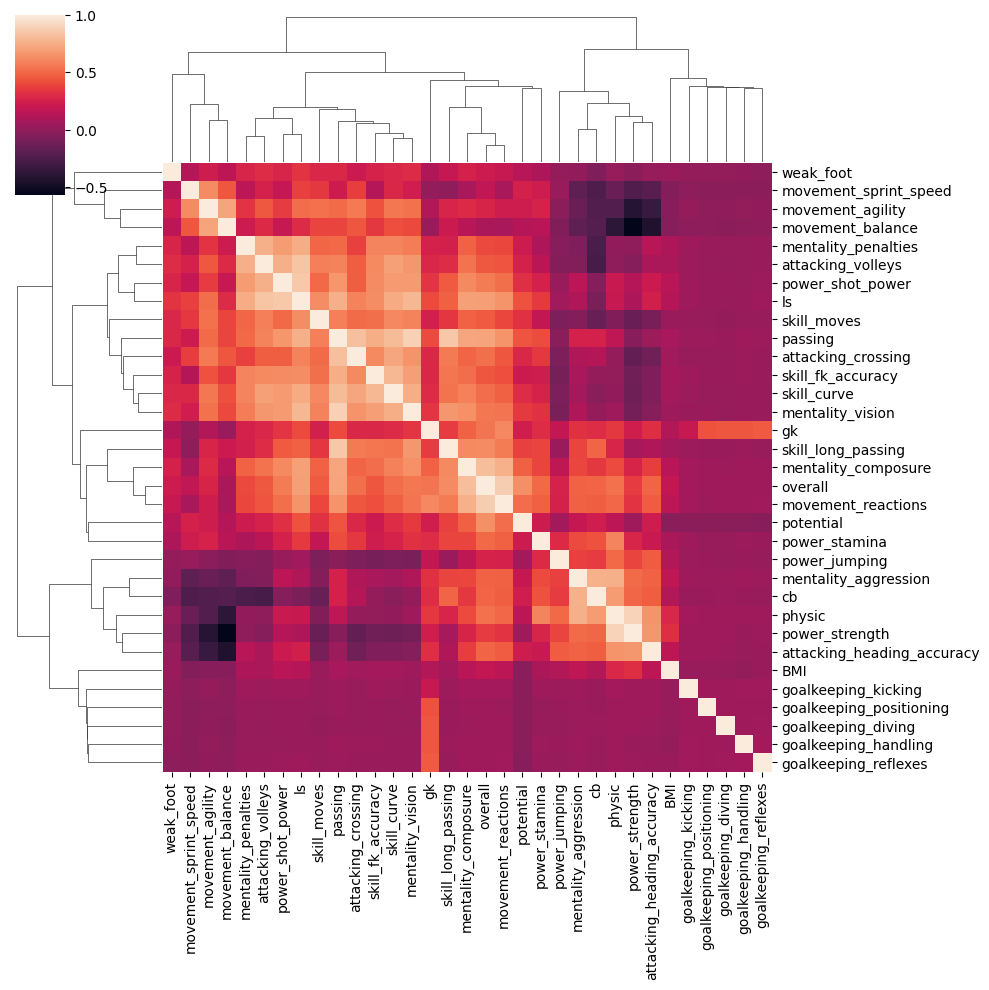

In [69]:
sns.clustermap(df_num_decorr.corr())
plt.show()

In [79]:
df_save = df.copy()
df_save["value_eur"] = data["value_eur"]
df_save["wage_eur"] = data["wage_eur"]

In [81]:
df_save.to_csv("cleaned_data.csv")

In [82]:
data.shape

(19239, 110)

### Prise en main des données

#### Equipe la plus chère

On créé l'équipe la plus chère, on se base sur leur valeur financière, et donc la feature "value_eur".

On extrait les goals et on trouve le plus cher.

In [69]:
df_gk = data[df["player_position"] == "GK"]

In [70]:
top_gk = ffu.find_k_max_in_column(1, df_gk, "value_eur").item()

In [71]:
goal_name = ffu.get_player_name_from_sofifa_id(top_gk)
goal_name

'Gianluigi Donnarumma'

In [72]:
highest_value_team = [goal_name]

On extrait les 10 joueurs non goal les plus chers.

In [73]:
df_players = data[df["player_position"] != "GK"]

In [74]:
top_players = ffu.find_k_max_in_column(10, df_players, "value_eur")

In [75]:
for top in top_players:
    highest_value_team.append(ffu.get_player_name_from_sofifa_id(top))


In [76]:
print("Composition de l'équipe la plus chère :\n", "   ".join(highest_value_team))

Composition de l'équipe la plus chère :
 Gianluigi Donnarumma   Kylian Mbappé Lottin   Erling Braut Haaland   Harry Kane   Neymar da Silva Santos Júnior   Kevin De Bruyne   Robert Lewandowski   Frenkie de Jong   Jadon Sancho   Trent Alexander-Arnold   Joshua Walter Kimmich


In [77]:
total_value = 0
for player in highest_value_team:
    total_value += data[data["long_name"] == player]["value_eur"].item()

print("Coût total de l'équipe la plus chère :", total_value, "euros")

Coût total de l'équipe la plus chère : 1412500000.0 euros


#### Equipe la plus forte

On se base sur la statistique "overall".

In [78]:
top_gk = ffu.find_k_max_in_column(1, df_gk, "overall").item()
goal_name = ffu.get_player_name_from_sofifa_id(top_gk)
strongest_team = [goal_name]
goal_name

'Jan Oblak'

In [79]:
top_players = ffu.find_k_max_in_column(10, df_players, "overall")
for top in top_players:
    strongest_team.append(ffu.get_player_name_from_sofifa_id(top))

print("Composition de l'équipe la plus forte :\n", "   ".join(strongest_team))

Composition de l'équipe la plus forte :
 Jan Oblak   Lionel Andrés Messi Cuccittini   Robert Lewandowski   Cristiano Ronaldo dos Santos Aveiro   Neymar da Silva Santos Júnior   Kevin De Bruyne   Kylian Mbappé Lottin   Harry Kane   N'Golo Kanté   Virgil van Dijk   Joshua Walter Kimmich


In [80]:
print("Joueurs en commun dans les deux équipes :\n", "  ".join(set(highest_value_team).intersection(set(strongest_team))))

Joueurs en commun dans les deux équipes :
 Kylian Mbappé Lottin  Neymar da Silva Santos Júnior  Robert Lewandowski  Harry Kane  Kevin De Bruyne  Joshua Walter Kimmich


Il y a 6 joueurs / 11 qui sont communs aux deux équipes, il y a donc probablement une corrélation importante entre la valeur d'un joueur et sa force (pour le top du classement en tout cas).

## 2. Segmentation

### Préparation des données pour l'étude

Comme spécifié, on écarte les goals de cette étude, ainsi que les features "overall", "Dwage", "Dvalue".

In [81]:
df["player_position"].value_counts()

MID    7033
DEF    6394
FWD    3680
GK     2132
Name: player_position, dtype: int64

In [82]:
df_seg = df[df["player_position"] != "GK"]

In [83]:
df_seg["player_position"].value_counts()

MID    7033
DEF    6394
FWD    3680
Name: player_position, dtype: int64

In [84]:
df_seg = df_seg.drop(["overall", "Dvalue", "Dwage", "nationality_id", "club_team_id", "nation_team_id", "league_level"], axis=1)

In [85]:
print(ffu.nb_not_nan_in_column(df_seg, "goalkeeping_speed"))

0


On remarque que toutes les valeurs de la feature goalkeeping_speed sont nulles pour le dataset de cette étude, on supprime donc cette colonne pour la segmentation.

In [86]:
df_seg = df_seg.drop("goalkeeping_speed", axis=1)

On observe les types des colonnes du dataset :

In [87]:
types = []
for column in df_seg.columns:
    typename = df_seg[column].dtype.name
    if typename not in types:
        types.append(typename)

print(types)

['int64', 'object', 'float64']


On ne garde que les features numériques, à savoir les int64 et float64.

In [88]:
cat_columns = []
for column in df_seg.columns:
    typename = df_seg[column].dtype.name
    if typename == 'object':
        cat_columns.append(column)

print(cat_columns)

['age', 'preferred_foot', 'player_position']


In [89]:
df_seg = df_seg.drop(cat_columns, axis=1)

In [90]:
df_seg.head()

,sofifa_id,potential,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,BMI
0,158023,93,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,64,64,64,66,61,50,50,50,61,19,24.913495
1,188545,92,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,90,90,90,85,88,88,88,85,86,86,86,84,80,80,80,84,64,66,66,66,64,61,60,60,60,61,19,23.666910
2,20801,91,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,90,90,90,88,89,89,89,88,86,86,86,86,78,78,78,86,63,59,59,59,63,60,53,53,53,60,20,23.735308
3,190871,91,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,83,83,83,90,88,88,88,90,89,89,89,89,82,82,82,89,67,63,63,63,67,62,50,50,50,62,20,22.204082
4,192985,91,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,83,83,83,88,87,87,87,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21,21.366869


In [91]:
mbappe_id = data[data["short_name"] == "K. Mbappé"]["sofifa_id"].item()
mbappe_id

231747

On stocke l'indice de Mbappé pour plus tard.

In [92]:
mbappe_index = df_seg[df_seg["sofifa_id"] == mbappe_id].index.item()
mbappe_index

6

On supprime l'id des joueurs, attribut qui va sinon polluer le clustering.

In [93]:
# on supprime enfin le sofifa_id
df_seg_anon = df_seg.drop("sofifa_id", axis=1)

In [94]:
ffu.print_nan_count_in_columns(df_seg_anon)

### 1ere tentative de clusterisation des joueurs : avec Kmeans

On évalue la qualité du clustering avec la métrique de Silhouette, qui est d'autant plus élevé que les clusters sont bien séparés et denses (minimisation de la distance intra-cluster et maximisation de la distance inter-clusters).  
On essaye différentes valeurs de nombre de clusters et on cherche le nombre qui maximise cette métrique.

In [95]:
X_seg = df_seg_anon.to_numpy()
X_seg_norm = (X_seg - np.min(X_seg)) / (np.max(X_seg) - np.min(X_seg))

n_clusters = np.arange(2,10,1)
silscores = np.zeros(n_clusters.shape[0])

for i in range(n_clusters.shape[0]):
    kmeans = KMeans(n_clusters=n_clusters[i])
    kmeans.fit(X_seg_norm)
    labels = kmeans.labels_
    silscores[i] = metrics.silhouette_score(X_seg_norm, labels)

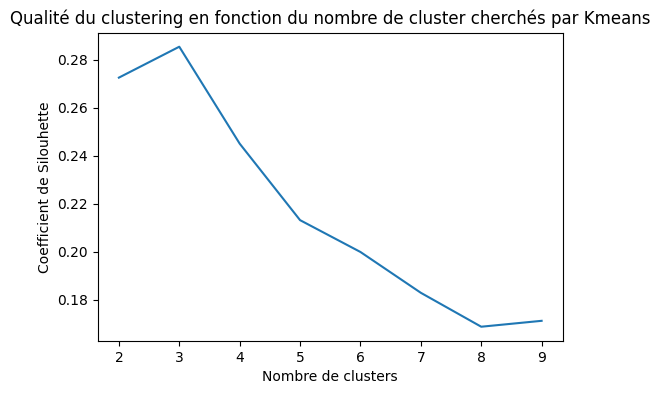

In [96]:
plt.figure(figsize=(6,4))
plt.plot(n_clusters, silscores)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de Silouhette")
plt.title("Qualité du clustering en fonction du nombre de cluster cherchés par Kmeans")
plt.show()

On choisit donc un nombre de clusters de 3, valeur qui maximise le coefficient de silouhette.

### Interprétation des groupes

On réalise un clustering avec 3 clusters et on regarde si les positions des joueurs sont liées à ce clustering.

In [97]:
NB_CLUSTERS = 3
kmeans = KMeans(n_clusters=NB_CLUSTERS).fit(X_seg_norm)

In [98]:
classes = kmeans.labels_

In [99]:
no_gk_positions = df[df["player_position"] != "GK"]["player_position"]
frame = {"position":no_gk_positions.to_numpy(), "class":pd.Series(classes, dtype="int")}
df_class_posi = pd.DataFrame(frame)
df_class_posi.head(1)

,position,class
0,FWD,1


On compte le nombre de chaque poste dans chaque groupe.

In [100]:
counts = []
for classnb in range(NB_CLUSTERS):
    dic = {}
    for line in range(df_class_posi.shape[0]):
        if classnb == df_class_posi.iloc[line]["class"]:
            posi = df_class_posi.iloc[line]["position"]
            if posi not in dic:
                dic[posi] = 1
            else:
                dic[posi] += 1
    counts.append(dic)

In [101]:
for classnb in range(NB_CLUSTERS):
    print(f"classe {classnb} : {counts[classnb]}")

classe 0 : {'FWD': 3283, 'MID': 2345, 'DEF': 16}
classe 1 : {'FWD': 386, 'MID': 3629, 'DEF': 2014}
classe 2 : {'DEF': 4364, 'MID': 1059, 'FWD': 11}


On remarque que chaque cluster comporte au moins 1.5 fois plus de joueurs d'une certaine position que des 2 autres positions.  
C'est particulièrement marqué pour la classe 2 qui ne comporte que très peu de défenseurs.  

En résumé :  
La classe 0 correspond aux joueurs milieux avec des capacités défensives.    
La classe 1 correspond aux joueurs très défensifs, avec des propriétés de milieu de terrain.  
La classe 2 correspond aux joueurs offensifs et milieux offensifs.

### Recherche de remplaçant pour MBappé

In [102]:
X_transform = kmeans.fit_transform(X_seg_norm)
mbappe_point = X_transform[mbappe_index]
euclidian_dist = np.sum(np.sqrt((X_transform - mbappe_point)**2), axis=1)
nearest_index = np.argsort(euclidian_dist)[1] # indice 0 est Mbappé car il est à distance 0 de lui-même

In [103]:
nearest_id = df_seg.iloc[13]["sofifa_id"]

In [104]:
ffu.get_player_name_from_sofifa_id(nearest_id)

'Mohamed Salah Ghaly'

En prenant le joueur le plus proche de Mbappé dans l'espace transformé par le clustering à 3 groupes, on trouve **Mohamed Salah Ghaly**. On pourrait donc estimer d'après notre étude qu'il s'agit d'un remplaçant judicieux pour Kylian Mbappé.